In [1]:
import pandas as pd, os
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

pd.set_option('display.max_columns', None)
import ast

# IMPORTANDO DADOS

In [2]:
df = pd.read_csv('files/raw.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   data     220 non-null    object
 1   alcohol  220 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


,data,alcohol
0,"[23534, 24013, 26216, 26172, 26108, 25037, 240...",False
1,"[23797, 24164, 26134, 26143, 26142, 26120, 253...",False
2,"[23899, 24905, 26249, 26359, 26335, 26225, 254...",False
3,"[23967, 24384, 26285, 26237, 26228, 26188, 261...",False
4,"[23859, 24287, 26269, 26188, 26115, 25477, 245...",False
...,...,...
215,"[17667, 17719, 17742, 17751, 17752, 17787, 178...",False
216,"[18480, 18518, 18389, 18616, 18676, 19648, 205...",True
217,"[18354, 18382, 18801, 19472, 19850, 19176, 168...",True
218,"[17507, 17507, 16270, 15272, 13966, 13690, 132...",True


In [3]:
df['alcohol'] = df.alcohol.apply(ast.literal_eval)
df['data']    = df.data.apply(ast.literal_eval)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   data     220 non-null    object
 1   alcohol  220 non-null    bool  
dtypes: bool(1), object(1)
memory usage: 2.1+ KB


,data,alcohol
0,"[23534, 24013, 26216, 26172, 26108, 25037, 240...",False
1,"[23797, 24164, 26134, 26143, 26142, 26120, 253...",False
2,"[23899, 24905, 26249, 26359, 26335, 26225, 254...",False
3,"[23967, 24384, 26285, 26237, 26228, 26188, 261...",False
4,"[23859, 24287, 26269, 26188, 26115, 25477, 245...",False
...,...,...
215,"[17667, 17719, 17742, 17751, 17752, 17787, 178...",False
216,"[18480, 18518, 18389, 18616, 18676, 19648, 205...",True
217,"[18354, 18382, 18801, 19472, 19850, 19176, 168...",True
218,"[17507, 17507, 16270, 15272, 13966, 13690, 132...",True


In [4]:
TARGET = 'alcohol'

for label in df[TARGET].unique():
    total = (df[TARGET] == label).sum()
    print(f'classe {label}: {(total)} ({total/len(df)*100:.2f}%)')

classe False: 110 (50.00%)
classe True: 110 (50.00%)


In [5]:
def applyNorm():
    yNorm = [[] for i in range(len(df))]

    for i, row in df.iterrows():
        mean = np.mean(row.data)
        std  = np.std(row.data)
        yNorm[i] = [float((value - mean)/std if std > 0.1 else 0) for value in row.data]

    return yNorm


#df['data'] = applyNorm()
df

,data,alcohol
0,"[23534, 24013, 26216, 26172, 26108, 25037, 240...",False
1,"[23797, 24164, 26134, 26143, 26142, 26120, 253...",False
2,"[23899, 24905, 26249, 26359, 26335, 26225, 254...",False
3,"[23967, 24384, 26285, 26237, 26228, 26188, 261...",False
4,"[23859, 24287, 26269, 26188, 26115, 25477, 245...",False
...,...,...
215,"[17667, 17719, 17742, 17751, 17752, 17787, 178...",False
216,"[18480, 18518, 18389, 18616, 18676, 19648, 205...",True
217,"[18354, 18382, 18801, 19472, 19850, 19176, 168...",True
218,"[17507, 17507, 16270, 15272, 13966, 13690, 132...",True


# VISUALIZAÇÃO

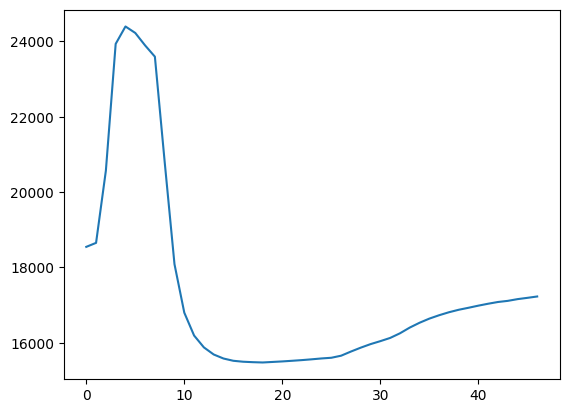

In [6]:
plt.plot(df.iloc[79].data)

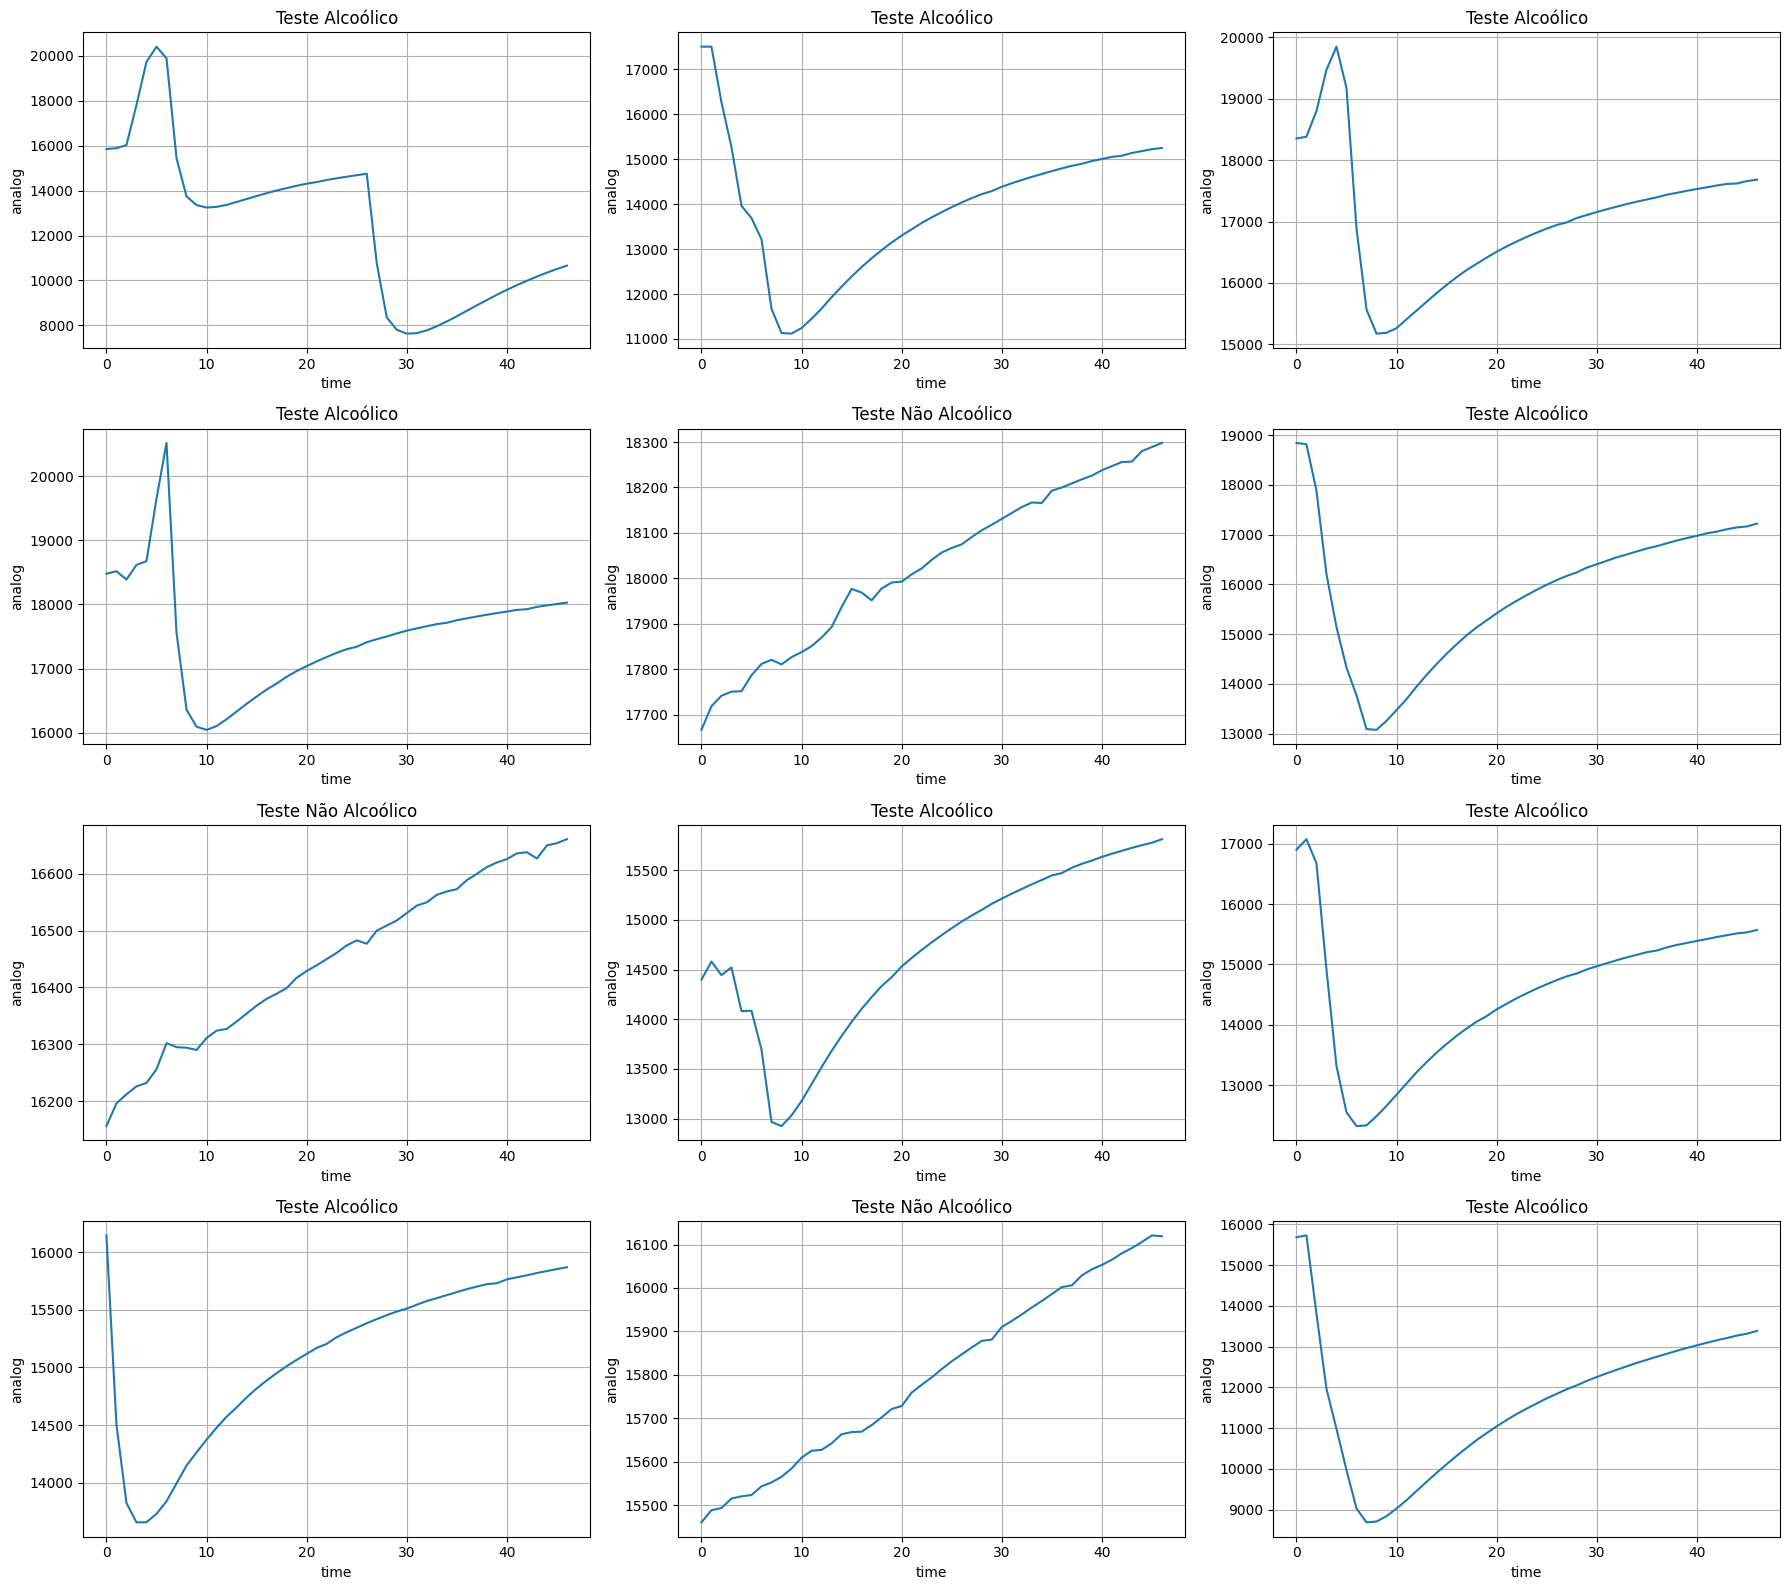

In [7]:
import math

def plotTables(df, limit=None):
    count   = len(df) if limit is None else min(limit, len(df))
    numCols = 3 if count >= 3 else count
    numRows = math.ceil(count / numCols)
    plt.figure(figsize=(6*numCols, 4*numRows))

    for idx, (i, row) in enumerate(df.iterrows()):
        if idx >= count:
            break

        plt.subplot(numRows, numCols, idx+1)
        plt.plot(row.data)
        plt.title(f'Teste {"Alcoólico" if row["alcohol"] else "Não Alcoólico"}')
        plt.grid(), plt.xlabel('time'), plt.ylabel('analog')

    plt.tight_layout()
    plt.show()


plotTables(df.iloc[::-1].reset_index(drop=True), limit=12)

# VERIFICANDO AMOSTRAGEM

In [8]:
from scipy.stats import skew, kurtosis
import numpy as np

In [9]:
df['mean'] = [np.mean(data) for data in df.data]
df['std']  = [np.std(data) for data in df.data]
df['min']    = [np.min(data) for data in df.data]
df['max']    = [np.max(data) for data in df.data]
df['first']  = [data[0] for data in df.data]
df['last']   = [data[-1] for data in df.data]
df['median'] = [np.median(data) for data in df.data]

# CORRELAÇÕES

- **Pearson:** $\Rightarrow$ Melhor quando a relação é linear e as variáveis são numéricas contínuas com distribuição razoavelmente normal, útil para dados em escala intervalar ou de razão, exemplo, altura e peso de pessoas na mesma faixa etária.

- **Spearman:** Ideal para relações monotônicas que podem ser não lineares e para dados com outliers ou escalas ordinais, funciona com rankings e Likert, exemplo, posição em um ranking de vendas versus satisfação do cliente em escala de 1 a 5.

- **Kendall:** Preferível em amostras pequenas ou com muitos empates em dados ordinais, mais robusta e interpretável como concordância de pares, exemplo, comparar duas ordens de preferência dadas por juízes.

In [10]:
TARGET

'alcohol'

{'min': -0.6162029928593284,
 'std': 0.6085093666349692,
 'median': -0.5945960429957107,
 'last': -0.5893020756498708,
 'mean': -0.5824153754755037,
 'max': -0.35257357770697295,
 'first': -0.20634330389815034}

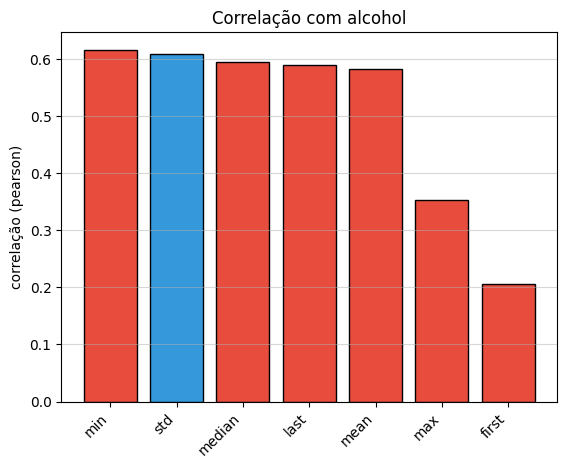

In [11]:
class Correlations:
    def __init__(self, df, tresh=0.5, method='pearson'):
        self.df = df.copy()
        self.tresh  = tresh
        self.method = method
        self.matrix = self.df.corr(method=self.method)

    def get(self, target_col):
        if target_col not in self.matrix.columns:
            return {}
            
        corr = self.matrix[target_col].drop(target_col)
        keep = corr[abs(corr) >= self.tresh].sort_values(key=abs, ascending=False)        
        return {ref: corr for ref, corr in keep.items()}
    
    def all(self):
        result = {}
        for col in self.matrix.columns:
            info = self.get(col)
            if len(info) > 0:
                result[col] = info
        return result
    
    def plot(self, target_col, show_max=None):
        corrs = self.get(target_col)
        
        if not corrs: 
            return
        
        original_values = self.matrix.loc[list(corrs.keys()), target_col]
        labels = [str(label)[:20] for label in corrs.keys()]
        values = [abs(v) for v in corrs.values()] # Altura da barra = Importância
        
        colors = ['#3498db' if original_values[label] > 0 else '#e74c3c' for label in corrs.keys()]
        plt.bar(labels[:show_max], values[:show_max], color=colors[:show_max], edgecolor='black')
        plt.title(f'Correlação com {target_col}')
        plt.ylabel(f'correlação ({self.method})'); plt.grid(axis='y', alpha=0.5)

        if len(corrs) >= 4:
            plt.xticks(rotation=45, ha='right')
    
    def heatmap(self, target_col, n=None):
        if target_col not in self.matrix.columns: 
            return

        top_cols = self.matrix[target_col].abs().sort_values(ascending=False).drop(target_col)
        
        if n: 
            top_cols = top_cols.head(n)
        
        cols_to_plot  = [target_col] + top_cols.index.tolist()
        matrix_subset = self.matrix.loc[cols_to_plot, cols_to_plot]

        plt.figure(figsize=(17, 10))
        sns.heatmap(matrix_subset.abs(), annot=True, fmt=".2f", cmap='Blues', vmin=0, vmax=1)
        plt.title(f'Mapa de Calor (Top {n})')
        plt.xticks(rotation=45, ha='right')
        plt.show()


corr = Correlations(df.drop(columns=['data']), tresh=0.00)
corr.plot(TARGET, show_max=None)
corr.get(TARGET)

In [12]:
keep = list(Correlations(df.drop(columns=['data']), tresh=0.10).get(TARGET).keys()) + [TARGET, 'data']
keep

['min', 'std', 'median', 'last', 'mean', 'max', 'first', 'alcohol', 'data']

In [13]:
df = pd.DataFrame({key: df[key] for key in keep})
df

,min,std,median,last,mean,max,first,alcohol,data
0,23250,742.479449,23281.0,23275,23557.723404,26216,23534,False,"[23534, 24013, 26216, 26172, 26108, 25037, 240..."
1,23536,748.382989,23585.0,23596,23877.446809,26143,23797,False,"[23797, 24164, 26134, 26143, 26142, 26120, 253..."
2,23695,749.516802,23765.0,23801,24055.574468,26359,23899,False,"[23899, 24905, 26249, 26359, 26335, 26225, 254..."
3,23523,941.151691,23586.0,23553,24066.489362,26285,23967,False,"[23967, 24384, 26285, 26237, 26228, 26188, 261..."
4,23826,715.797389,23938.0,23943,24297.723404,26269,23859,False,"[23859, 24287, 26269, 26188, 26115, 25477, 245..."
...,...,...,...,...,...,...,...,...,...
215,17667,178.611054,18041.0,18298,18025.531915,18298,17667,False,"[17667, 17719, 17742, 17751, 17752, 17787, 178..."
216,16046,875.705481,17592.0,18029,17533.319149,20518,18480,True,"[18480, 18518, 18389, 18616, 18676, 19648, 205..."
217,15173,1063.603226,17106.0,17682,17032.446809,19850,18354,True,"[18354, 18382, 18801, 19472, 19850, 19176, 168..."
218,11119,1488.948178,14135.0,15251,13937.787234,17507,17507,True,"[17507, 17507, 16270, 15272, 13966, 13690, 132..."


# VISUALIZAÇÃO

In [14]:
df.to_csv('files/Model.csv', index=None)